## Examine the dataset and use the most effective visualization graph to address the following questions. Provide your answers and analyses for each question alongside the visualizations.

* **How Does the Funding Ecosystem changes with respect to Time?**
* **What is the General Amount that Startups get in India?**
* **Which Kind of Industries are more preferred for Startups?**
* **Does Location also play a role, In determining the Growth of a Startup?**
* **Who plays the main role in Indian Startups Ecosystem?**
* **What are the different Types of Funding for Startups?**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv("D:\\AIML\\5000 0NB_Data Analytics\\ASSIGN - 1\\startup_funding.csv")
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


***1. How Does the Funding Ecosystem change with respect to Time?***

In [6]:
# Clean the date column (assuming it's in 'dd/mm/yyyy' format)
df['Date'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')
 
# Step to extract the year
df['Year'] = df['Date'].dt.year
 
# Display the updated dataset with the extracted year
df[['Date', 'Year']].head()

,Date,Year
0,2020-01-09,2020.0
1,2020-01-13,2020.0
2,2020-01-09,2020.0
3,2020-01-02,2020.0
4,2020-01-02,2020.0


In [7]:
# Step 1: Clean 'Amount in USD' column
# Remove commas and convert to numeric, forcing errors to NaN
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'].str.replace(',', '').str.replace('₹', '').str.strip(), errors='coerce')
 
# Check the cleaned dataset
df[['Amount in USD']].head()

,Amount in USD
0,200000000.0
1,8048394.0
2,18358860.0
3,3000000.0
4,1800000.0


In [8]:
# Aggregate the total funding by year
funding_by_year = df.groupby('Year')['Amount in USD'].sum().reset_index()
print(funding_by_year)

     Year  Amount in USD
0  2015.0   8.597207e+09
1  2016.0   3.828089e+09
2  2017.0   1.042931e+10
3  2018.0   5.116118e+09
4  2019.0   9.686577e+09
5  2020.0   3.902073e+08


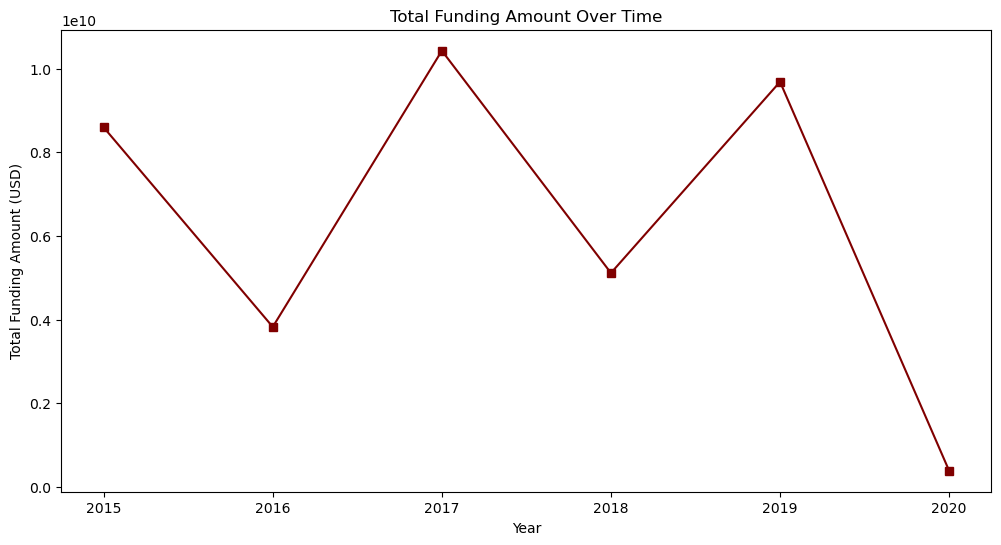

In [19]:
# Create a line plot to visualize the funding trends
plt.figure(figsize=(12, 6))
plt.plot(funding_by_year['Year'], funding_by_year['Amount in USD'], marker='s', color='maroon')
plt.title('Total Funding Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (USD)')
plt.xticks(funding_by_year['Year'])  # Show all years on x-axis
plt.show()

***1.A.From the above graph, we can analyse that from 2015 to 2020, there is a similar pattern of rise an fall in each year. Though the highs has a significantly less difference, the lows drastically fall by 2020. From the funding ecosystem, we can expect a rise and expect it to be similar with the highs.***

***2. What is the General Amount that Startups get in India?***

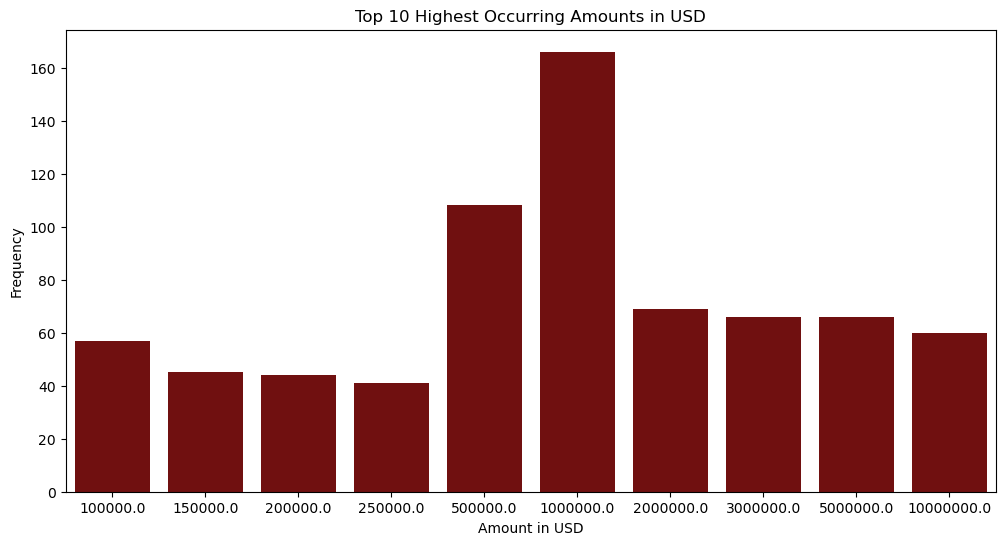

In [34]:
# Top 10 frequent values in 'Amount in USD'
top_10_amounts = df['Amount in USD'].value_counts().nlargest(10)

# Top 10 highest occurring amounts using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_amounts.index, y=top_10_amounts.values, color='maroon')
plt.title('Top 10 Highest Occurring Amounts in USD')
plt.xlabel('Amount in USD')
plt.ylabel('Frequency')
plt.show()


***2.A.From the above graph, the general amount startup gets is around 1000000.***

***3. Which Kind of Industries are more preferred for Startups?***

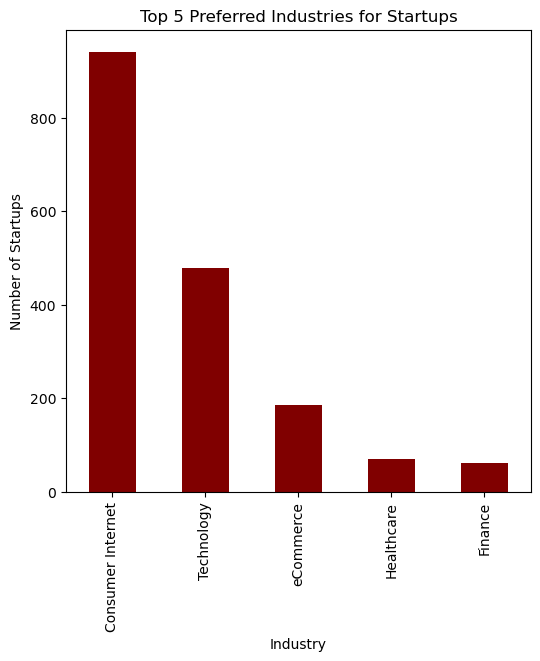

In [44]:
industry_counts = df["Industry Vertical"].value_counts().head(5)

# Plot a bar chart
plt.figure(figsize=(6, 6))
industry_counts.plot(kind='bar', color='maroon')
plt.title('Top 5 Preferred Industries for Startups')
plt.xlabel('Industry')
plt.ylabel('Number of Startups')
plt.xticks()
plt.show()

***3.A.From the above graph, Consumer Internet ranks most preferred for Startups.***

***4.Does Location also play a role, In determining the Growth of a Startup?***

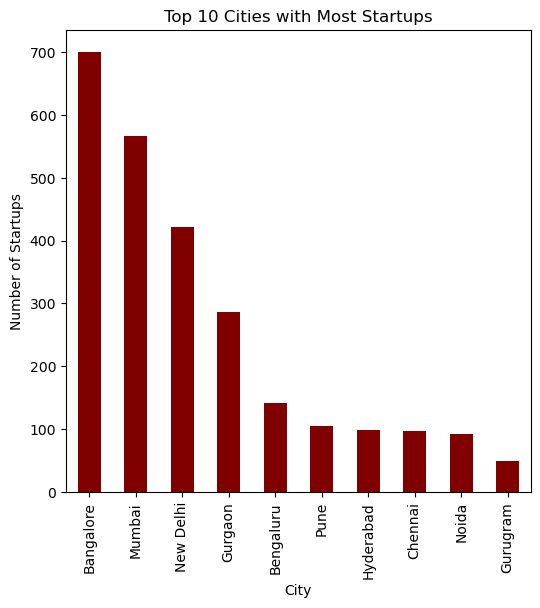

In [55]:
# Count the number of startups by city/location
location_counts = df["City  Location"].value_counts().head(10)

# Plot a bar chart
plt.figure(figsize=(6, 6))
location_counts.plot(kind='bar', color='maroon')
plt.title('Top 10 Cities with Most Startups')
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.xticks()
plt.show()

***4.A. From the above graph, the answer is yes, as the number of startups are varying from city to city.***

***5.Who plays the main role in Indian Startups Ecosystem?***

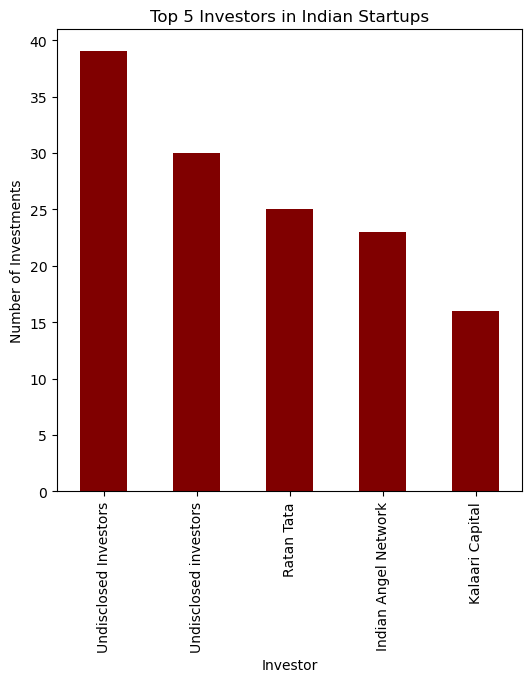

In [61]:
investors= df["Investors Name"].value_counts().head(5)

# Plot a bar chart
plt.figure(figsize=(6, 6))
investors.plot(kind='bar', color='maroon')
plt.title('Top 5 Investors in Indian Startups')
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.xticks()
plt.show()

***5.A. From the above graph, we can analyse that in Indian Startup ecosystem, many investors who does not disclosed themselves plays major role.***

***6.What are the different Types of Funding for Startups?***

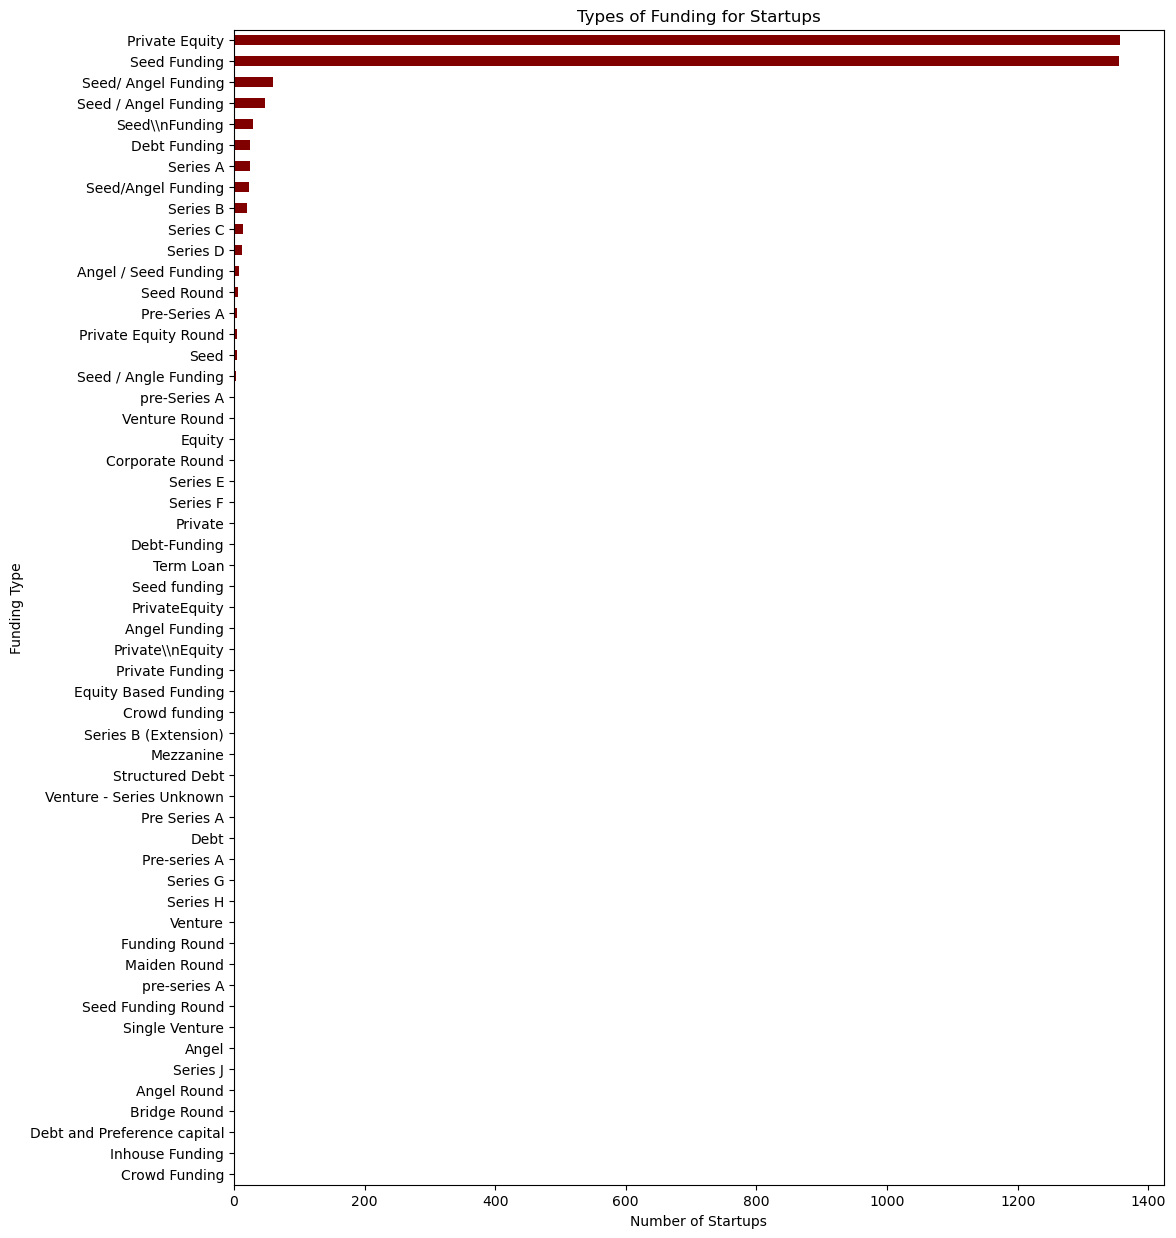

In [75]:
funding_type_counts = df["InvestmentnType"].value_counts()

#Plot a horizontal bar chart for all funding types
plt.figure(figsize=(12, 15))
funding_type_counts.plot(kind='barh', color='maroon')
plt.title('Types of Funding for Startups')
plt.xlabel('Number of Startups')
plt.ylabel('Funding Type')
plt.gca().invert_yaxis() 
plt.show()

***6.A.From the graph above we can see different types of funding for startups ranking from the most funded to least.*** 